#MODELO CLUSTERIZACION PUNTOS MEDIDA TRAFICO
Con el siguiente modelo se realiza la agrupación de los puntos de medida del trafico en la ciudad de Madrid ya que se considera que la carga o intensidad del trafico en los puntos del trafico cercanos tienen una influencia en los puntos vecinos. Dicha agrupación se realiza mediante un modelo de clusterización.

#0 - Inicialización

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#%% Carga de librerías.
import pandas as pd
from sklearn import preprocessing 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#1- Datos

In [4]:
# Carga del dataframe.
dataframe = pd.read_csv('/content/drive/MyDrive/datosmadrid/cluster_final/pmed_ubicacion_final.csv',';',low_memory=False)

# La función head de pandas nos sirve para imprimir por pantalla las primeras filas del dataframe
print(dataframe.head(3))

#comprobamos tipo datos contenido en la tabla
dataframe.dtypes

     id  longitud    latitud
0  3840 -3.688323  40.430502
1  3841 -3.687256  40.430524
2  3842 -3.691727  40.422132


id            int64
longitud    float64
latitud     float64
dtype: object

In [5]:
#convertimos datos id en categorico
dataframe["id"]=dataframe["id"].astype("category")
dataframe.dtypes

id          category
longitud     float64
latitud      float64
dtype: object

#2-Exploracion Dato

No handles with labels found to put in legend.


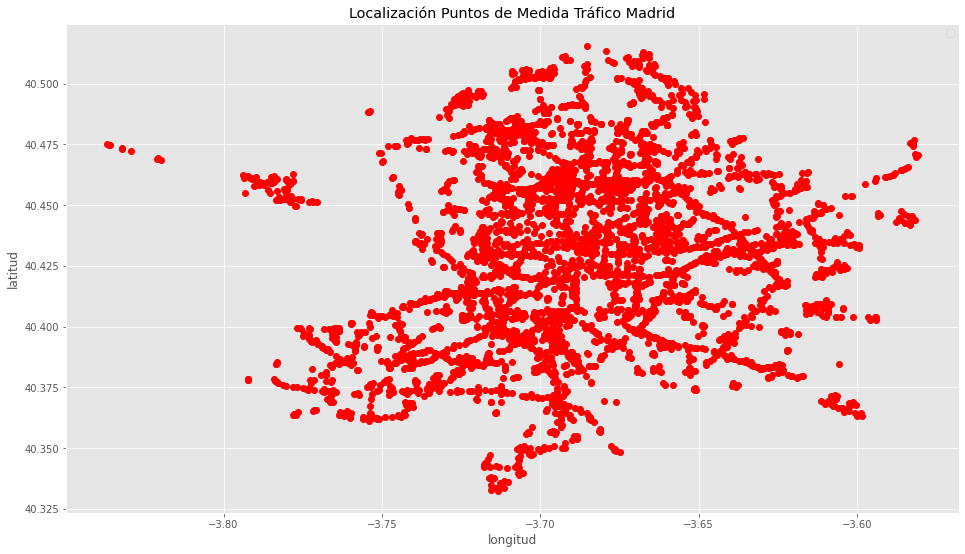

In [6]:
#Imprimimos puntos de medida, latitud y longitud
plt.plot(dataframe["longitud"],dataframe["latitud"], 'ro')
plt.title('Localización Puntos de Medida Tráfico Madrid')
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.legend()
plt.show()

#3 - Modelo

In [7]:
#Se crean los vectores para la clusterizacion de los puntos de medida
X = np.array(dataframe[["longitud","latitud"]])
y = np.array(dataframe['id'])
X.shape

(4253, 2)

In [8]:
#Se crea el modelo de clusterizacion
#No se utiliza el modelo del codo para cálcular K ya que lo que se busca es una grupación de ptos cercanos
#se utiliza K=300 para agrupar aproximadamente 15puntos cercanos
kmeans = KMeans(n_clusters=300).fit(X)
etiqueta=kmeans.labels_
print(etiqueta)
centroids = kmeans.cluster_centers_
print(centroids)

[143 143 283 ... 238 238 238]
[[-3.64423542 40.388573  ]
 [-3.7204496  40.47247251]
 [-3.73166832 40.38839334]
 [-3.67651073 40.45893362]
 [-3.62466699 40.45456737]
 [-3.69005159 40.4074636 ]
 [-3.78250216 40.46015648]
 [-3.64632461 40.4284734 ]
 [-3.68556232 40.36351913]
 [-3.71324626 40.42291409]
 [-3.68920686 40.49153989]
 [-3.792233   40.37816734]
 [-3.66810048 40.49517061]
 [-3.6240362  40.41810329]
 [-3.74827938 40.37529578]
 [-3.67637448 40.39268581]
 [-3.66886601 40.43609119]
 [-3.7556217  40.39710503]
 [-3.6921481  40.44019792]
 [-3.70324073 40.45066423]
 [-3.60791514 40.36933166]
 [-3.70725428 40.3416593 ]
 [-3.58207995 40.47379457]
 [-3.70821656 40.39438488]
 [-3.6666487  40.46758067]
 [-3.72665122 40.43996655]
 [-3.67562411 40.41885288]
 [-3.62099031 40.43451972]
 [-3.71992586 40.49591259]
 [-3.65873229 40.41156347]
 [-3.72920564 40.41326656]
 [-3.69074578 40.38299773]
 [-3.71281825 40.47691872]
 [-3.73909283 40.4761549 ]
 [-3.65573002 40.45570445]
 [-3.76138126 40.36392397

#4 - Resultados

In [9]:
#Se añade en la tabla el cluster al que pertence cada punto de medida
lista= etiqueta.tolist()
print(lista)
dataframe['cluster'] = lista
print(dataframe.head(3))
dataframe["longitud"]=dataframe["longitud"].astype("category")
dataframe["latitud"]=dataframe["latitud"].astype("category")
dataframe_centroids = pd.DataFrame(centroids, columns=['longitud', 'latitud'])
print(dataframe_centroids.head(3))
dataframe_centroids["longitud"]=dataframe_centroids["longitud"].astype("category")
dataframe_centroids["latitud"]=dataframe_centroids["latitud"].astype("category")
dataframe_centroids.dtypes

[143, 143, 283, 52, 197, 283, 80, 80, 283, 80, 283, 283, 283, 283, 283, 283, 283, 197, 80, 80, 283, 283, 283, 283, 283, 225, 112, 112, 112, 112, 112, 112, 112, 112, 112, 138, 138, 138, 138, 138, 138, 138, 138, 138, 65, 65, 65, 112, 112, 112, 225, 225, 225, 122, 122, 138, 138, 280, 280, 280, 112, 112, 112, 138, 138, 138, 122, 205, 205, 205, 205, 65, 65, 65, 160, 160, 205, 205, 65, 205, 205, 205, 65, 65, 65, 65, 65, 65, 65, 65, 225, 122, 122, 138, 138, 112, 112, 112, 138, 65, 271, 271, 271, 99, 99, 99, 248, 99, 248, 241, 241, 241, 100, 100, 100, 241, 241, 241, 241, 241, 100, 100, 100, 64, 100, 71, 71, 71, 241, 71, 71, 241, 100, 100, 241, 100, 241, 30, 133, 30, 240, 136, 136, 136, 136, 241, 71, 135, 143, 135, 193, 197, 52, 197, 197, 283, 283, 135, 197, 197, 197, 143, 143, 283, 283, 142, 135, 283, 283, 71, 71, 52, 133, 133, 133, 136, 136, 136, 253, 143, 199, 199, 253, 253, 135, 135, 96, 253, 197, 135, 135, 96, 143, 135, 135, 135, 135, 66, 197, 197, 143, 135, 135, 253, 253, 253, 197, 197, 1

longitud    category
latitud     category
dtype: object

In [10]:
#Se extrae la tabla de puntos de medida con el cluster
dataframe.to_csv('clusterptosmedida.csv')
#Se extrae la tabla con la posicion de los centroides
dataframe_centroids.to_csv('situacioncentroides.csv')

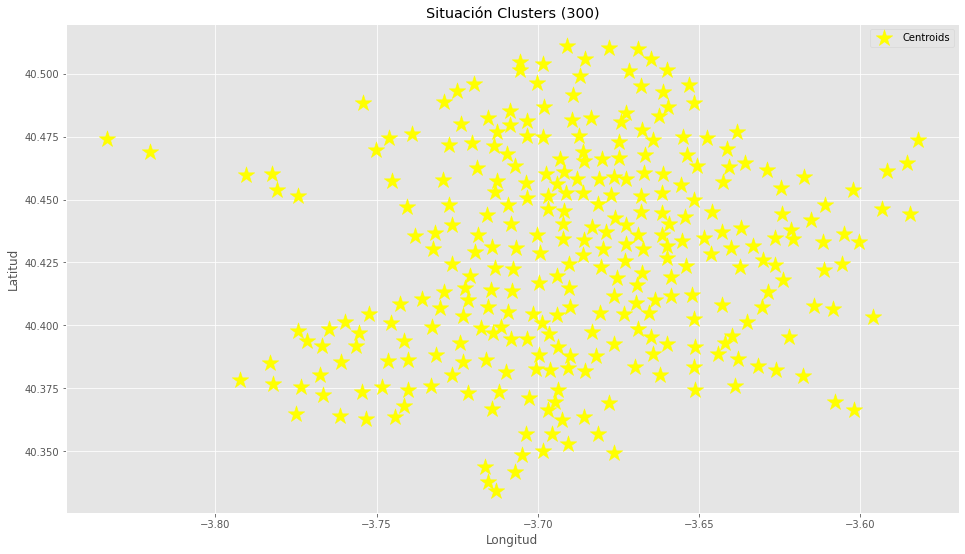

In [11]:
#Se muestra la situación de los Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')

plt.title('Situación Clusters (300)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [12]:
#Comprobación del cluster en que se encuentra cada punto de medida
#Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
X_prediccion = kmeans.predict(X)
for i, pred in enumerate(X_prediccion):
    print( "Pto medida Id:",y[i], "se encuentra en el clúster:", pred)

Pto medida Id: 3840 se encuentra en el clúster: 143
Pto medida Id: 3841 se encuentra en el clúster: 143
Pto medida Id: 3842 se encuentra en el clúster: 283
Pto medida Id: 3843 se encuentra en el clúster: 52
Pto medida Id: 3844 se encuentra en el clúster: 197
Pto medida Id: 3845 se encuentra en el clúster: 283
Pto medida Id: 3846 se encuentra en el clúster: 80
Pto medida Id: 3847 se encuentra en el clúster: 80
Pto medida Id: 3848 se encuentra en el clúster: 283
Pto medida Id: 3849 se encuentra en el clúster: 80
Pto medida Id: 3850 se encuentra en el clúster: 283
Pto medida Id: 7029 se encuentra en el clúster: 283
Pto medida Id: 10034 se encuentra en el clúster: 283
Pto medida Id: 3851 se encuentra en el clúster: 283
Pto medida Id: 7033 se encuentra en el clúster: 283
Pto medida Id: 10035 se encuentra en el clúster: 283
Pto medida Id: 10036 se encuentra en el clúster: 283
Pto medida Id: 3562 se encuentra en el clúster: 197
Pto medida Id: 3854 se encuentra en el clúster: 80
Pto medida Id:

# New Section